> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensures that graphs are displayed within the notebook
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [14]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

# Load the dataset
df = pd.read_csv('KaggleV2-May-2016.csv')

# Display the first few rows to confirm successful loading
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Check for and handle missing values
print(df.isnull().sum())

# Checking data types
print(df.dtypes)

# Example: Remove duplicates, if any
df.drop_duplicates(inplace=True)

# Renaming columns
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

# Checking for duplicates
print(df.duplicated().sum())

# Removing duplicates
df.drop_duplicates(inplace=True)


# Convert date columns to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


# Creating a waiting time column
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Convert 'No-show' to a numeric format: 1 for 'Yes' and 0 for 'No'
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
WaitingTime       0
DayOfWeek         0
dtype: int64
PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
WaitingTime                     int64
DayOfWeek                      object
dtype: object
0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Does the day of the week affect no-show rates?

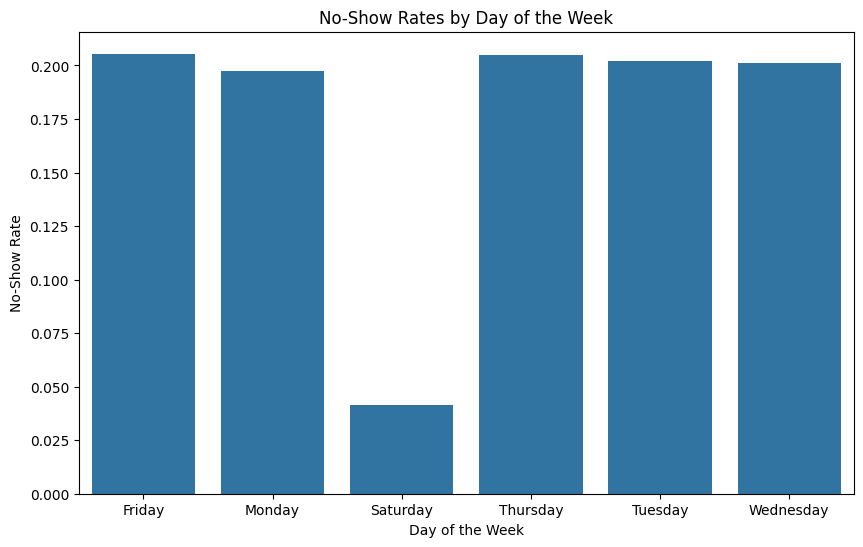

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Ensure 'ScheduledDay' is in datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Extract the day of the week
df['DayOfWeek'] = df['ScheduledDay'].dt.day_name()

# Calculate no-show rates by day of the week
no_show_rates = df.groupby('DayOfWeek')['No-show'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=no_show_rates.index, y=no_show_rates.values)
plt.title('No-Show Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No-Show Rate')
plt.show()


### Research Question 2: Is there a relationship between age and no-show rates?

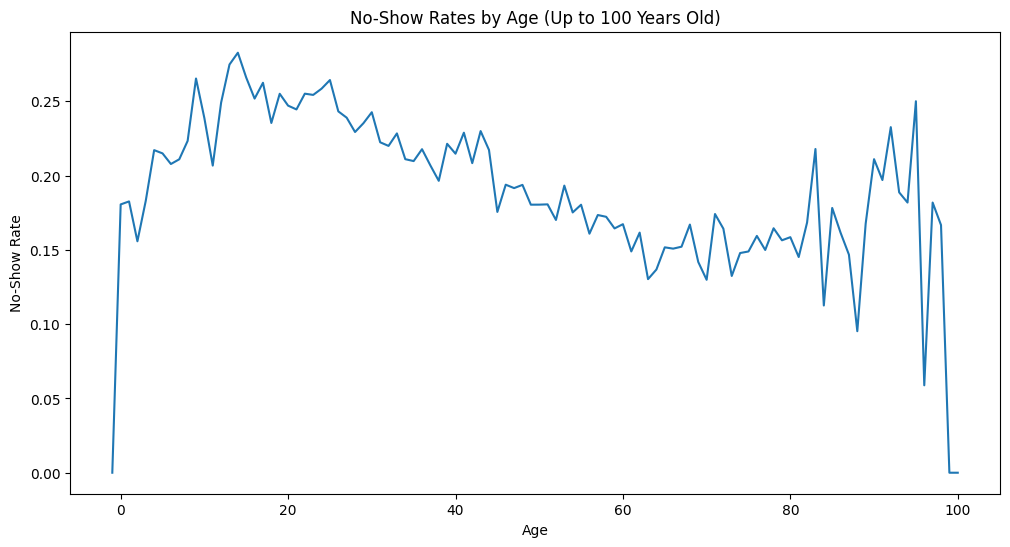

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Filter out people over 100 years old
df_filtered = df[df['Age'] <= 100]

# Group by Age and calculate mean no-show for the filtered data
age_no_show_filtered = df_filtered.groupby('Age')['No-show'].mean()

# Plotting
plt.figure(figsize=(12, 6))
age_no_show_filtered.plot(kind='line')
plt.title('No-Show Rates by Age (Up to 100 Years Old)')
plt.xlabel('Age')
plt.ylabel('No-Show Rate')
plt.show()


## Research Question 3: Do SMS reminders decrease the likelihood of no-shows?

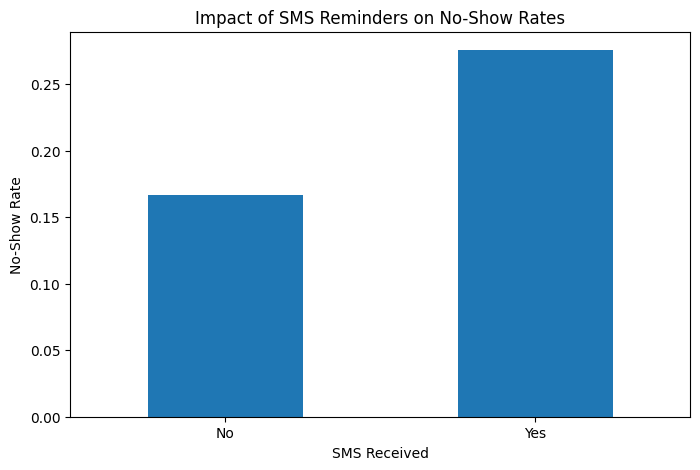

In [22]:
# Compare no-show rates between those who received SMS reminders and those who didn't
sms_no_show = df.groupby('SMS_received')['No-show'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sms_no_show.plot(kind='bar')
plt.title('Impact of SMS Reminders on No-Show Rates')
plt.xlabel('SMS Received')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('No-Show Rate')
plt.show()


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Conclusions:

### Research Question 1: Does the day of the week affect no-show rates?
The bar chart above shows the day of the week influences no-show rates. Saturday has the lowest no-show rate, conceivably due to fewer appointments scheduled for that day or because patients find it more convenient to visit on weekends. The highest no-show rates are observed on Tuesdays and Wednesdays. This analysis does not regard the total number of appointments per day or other factors that might influence no-shows, such as work schedules, transportation issues, or appointment types. Additional research could involve a deeper investigation into the reasons behind these trends and considering the total volume of appointments by day.

### Research Question 2: Is there a relationship between age and no-show rates?
The line chart suggests a relationship between age and no-show rates. Young adults (up to around 20 years old) show higher no-show rates, slowly decreasing as age increases, leveling off in the middle-aged demographic. There is an increase in no-show rates as the age gets closer to 80 years old, near which the trend fluctuates more noticeably. It would be prudent to investigate further the social and logistical factors affecting different age groups.

### Research Question 3: Do SMS reminders decrease the likelihood of no-shows?
According to the third bar chart, patients who received SMS reminders have a higher no-show rate than those who did not receive an SMS. This is counterintuitive as one might expect reminders to reduce the no-show rate. This result might indicate that SMS reminders were sent to patients who were already identified as having a higher risk of not showing up, or there could be other underlying factors not accounted for in the dataset. Additional data and a more refined study design would be necessary to determine the effectiveness of SMS reminders, including controlled trials or more granular data on the timing and frequency of the reminders.

### Limitations
- Sample Bias: The conclusions may only generalize well if the data represents the broader population who visit the clinic.
Missing Variables: There could be essential variables not included in the dataset that significantly affect no-show rates, such as weather conditions, transportation options, or specifics about the appointment types.
- Causality: This analysis does not infer causality. The relationships observed are purely correlational; further statistical testing would be required to make causal inferences.
- Data Integrity: The unexpected findings, especially in the SMS reminder analysis, suggest there might be issues with data integrity or other confounding factors not considered in the dataset.

In [29]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb